## Luglio 2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as st

### Esercizio 0
### 0.1
1B -> 2A normale, 1A -> 2B esponenziale

### 0.2 
Il valore atteso minore è b, poichè è l'area sopra la curva.

### 0.3
Il valore 2:
- (X) 70esimo p
- (Y) 20p

### 0.4
cinquantesimo percentile:
- (X,a) 1
- (Y,b) 3

### 0.5
$P(2 \leq X \leq 5) = F_X(5) - F_X(2) = 1 - 0.8 = 0.2$

$P(2 \leq Y \leq 5) = F_Y(5)-F_Y(2) = 0.8 - 0.2$

### 0.6
La  mediana è minore della media.

### Esercizio 1
$X \sim Exp(\nu)$

1) $f_X(x) = \nu e^{-\nu x}$

2) $E(X) = \frac{1}{\nu}$ = deviazione standard

3) $T_n = \overline{X}$, $E(T_n) = \frac{1}{n} E(\sum X_i) = \frac{1}{n}\sum E(X_i) = \frac{1}{n}n\frac{1}{\nu} = \frac{1}{\nu}$

4) Poichè $\frac{1}{\nu}$ è il valore atteso di x allora avremo $\nu = \frac{1}{E(X)}$ quindi 
$$\frac{1}{T_n} = R_n$$

### Esercizio 2

In [2]:
cani = pd.read_csv("cani.csv",delimiter=";",decimal=",")
cani.columns

Index(['Cartella', 'IP', 'GravitaIP', 'EtaAnni', 'MORTE', 'MC', 'SURVIVALTIME',
       'Terapia', 'Antiaritmico', 'PesoKg', 'VTricuspide', 'AsxAo', 'OndaE',
       'OndaEA', 'FrazEspuls', 'FrazAccorc', 'EDVI', 'ESVI', 'Allodiast',
       'Allosist'],
      dtype='object')

### 2.1.1

In [3]:

ar = pd.crosstab(index=cani['Antiaritmico'],columns=["Abs. Freq."],colnames=[''])
ar

,Abs. Freq.
Antiaritmico,
NO,150
SI,11


### 2.1.2

In [4]:
len(cani[cani['Antiaritmico'] == 'SI'])

11

### 2.1.3

In [5]:
print("Si == 1, NO == 0")

Si == 1, NO == 0


### 2.1.4

In [6]:
pd.crosstab(index=cani['Antiaritmico'],columns=cani['MC'],colnames=['Cani Morti Cardiaci'])

Cani Morti Cardiaci,0.0,1.0
Antiaritmico,,
NO,28,78
SI,0,9


### 2.1.5

In [7]:
len(cani.MC[cani.Antiaritmico == 'SI'])*100/len(cani.MC)

6.832298136645963

### 2.2.1

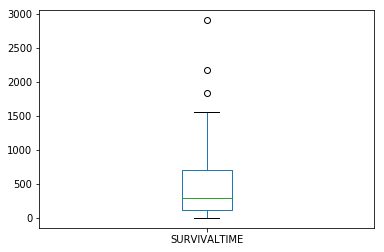

In [8]:
cani['SURVIVALTIME'].plot.box()
plt.show()

### 2.2.2

In [9]:
cani['SURVIVALTIME'].quantile(0.25),cani['SURVIVALTIME'].quantile(0.75)
canibox= cani[(cani['SURVIVALTIME']>=113)&(cani['SURVIVALTIME']<=711)]
print("I cani rappresentati dal quadrato all'interno del box plot sono : {}".format(len(canibox)))

I cani rappresentati dal quadrato all'interno del box plot sono : 81


### 2.2.3

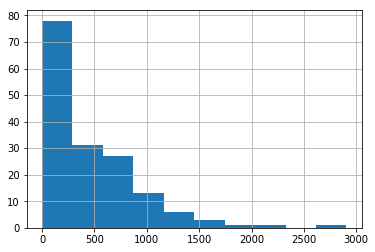

In [10]:
cani['SURVIVALTIME'].hist()
plt.show()

### 2.2.4

In [11]:
print("Come si può vedere dal grafico si può supporre un modello esponenziale. Inoltre solitamente il modello esponenziale viene usato per descrivere il tempo di vita di un fenomeno")

Come si può vedere dal grafico si può supporre un modello esponenziale. Inoltre solitamente il modello esponenziale viene usato per descrivere il tempo di vita di un fenomeno


### 2.2.5

In [12]:
cani['SURVIVALTIME'].mean()

459.888198757764

### 2.2.6

In [13]:
cani['SURVIVALTIME'].std()

467.1967063479367

### 2.2.7

In [14]:
print("Esponenziale: 1/valore atteso -> 1/(cani['SURVIVALTIME'].mean() cioè {}".format(1/(cani['SURVIVALTIME'].mean())))

Esponenziale: 1/valore atteso -> 1/(cani['SURVIVALTIME'].mean() cioè 0.0021744415331838686


### Esercizio 3

In [15]:
canimorti = cani[cani['MORTE'] == 1]
canimortinna = canimorti.dropna(axis=0,subset=['MC'])
canimortinna = canimorti.dropna(axis=0,subset=['OndaEA'])

### 3.1

In [16]:
#1
canimortinna['OndaEA'].head()
print("Scalare")

Scalare


### 3.2

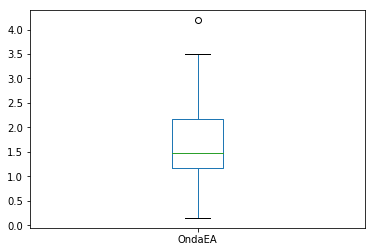

In [17]:
canimortinna['OndaEA'].plot.box()

### 3.3

In [18]:
max(canimortinna['OndaEA'])

4.19

### 3.4

In [19]:
#4
canimortinna[canimortinna['OndaEA'] == 4.19]['MC']
print("Si è morto per cause cardiache")

Si è morto per cause cardiache


### 3.5

In [20]:
#5
s = canimortinna[canimortinna['MC'] == 0]['OndaEA'].quantile(0.75)
s

1.41

### 3.6

In [21]:
#6
mask1 = canimortinna['MORTE'] == 1
mask2 = canimortinna['MC'] == 0
mask3 = canimortinna['MC'] == 1
print("I cani morti per cause cardiache sono: {}".format(len(canimortinna[mask1 & mask3])))
print("I cani morti per cause non cardiache sono: {}".format(len(canimortinna[mask1 & mask2])))

I cani morti per cause cardiache sono: 66
I cani morti per cause non cardiache sono: 17


### 3.7

In [22]:
#7
mask4 = canimortinna['OndaEA'] >= s
mask5 = canimortinna['OndaEA'] < s
print(">= : {}".format(len(canimortinna[mask1 & mask3 & mask4])))
print("< :{}".format(len(canimortinna[mask1 & mask2 & mask5])))

>= : 41
< :12


In [23]:
print('Cani morti per altre cause con valore di OndaEA >=s\nFalso Positivo : {}\nCani morti per cause cardiache con valore di OndaEA < s\nFalso Negativo : {}'.format(len(canimortinna[mask1 & mask2 & mask4]),len(canimortinna[mask1 & mask3 & mask5])))

Cani morti per altre cause con valore di OndaEA >=s
Falso Positivo : 5
Cani morti per cause cardiache con valore di OndaEA < s
Falso Negativo : 25


### 3.8

In [24]:
print("Sensibilità : {}\nSpecificità : {}".format((41/66),(12/17)))

Sensibilità : 0.6212121212121212
Specificità : 0.7058823529411765
